In [1]:
%run 2.1_data_preparation_news.ipynb

Date      datetime64[ns]
Open             float64
Close            float64
Volume             int64
dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title              object
Tag                object
Date       datetime64[ns]
Content            object
dtype: object


In [2]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
import re

In [3]:
print("Spalten:", df_news.columns.tolist())
print("Anzahl der Einträge:", len(df_news))
df_news.head()

Spalten: ['Title', 'Tag', 'Date_x', 'Content', 'Cleaned Content', 'Weekday', 'Impact Date', 'Date_y', 'Label', 'Change', 'Sma_5', 'Volatility', 'Prev_change', 'Simple Label', 'finbert_sentiment', 'finbert_label']
Anzahl der Einträge: 13636


,Title,Tag,Date_x,Content,Cleaned Content,Weekday,Impact Date,Date_y,Label,Change,Sma_5,Volatility,Prev_change,Simple Label,finbert_sentiment,finbert_label
0,"TSX Slightly Down, Books Weekly Gains",Stock Market,2023-07-16,"TSX Slightly Down, Books Weekly GainsUnited St...","[tsx, slightly, books, weekly, gains, united, ...",Sunday,2023-07-17,2023-07-17,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': 0.011293465, 'neutral': 0.9567599...",neutral
1,US Budget Deficit Widens More than Expected in...,Government Budget Value,2023-07-14,US Budget Deficit Widens More than Expected in...,"[budget, deficit, widens, expected, june, unit...",Friday,2023-07-17,2023-07-17,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': 0.6081916, 'neutral': 0.36712545,...",negative
2,Visa Hits 24-week High,stocks,2023-07-14,Visa Hits 24-week HighUnited States stocksVisa...,"[visa, hits, week, high, united, states, stock...",Friday,2023-07-17,2023-07-17,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': 0.7537409, 'neutral': 0.06819168,...",negative
3,Amazon Hits 43-week High,stocks,2023-07-14,Amazon Hits 43-week HighUnited States stocksAm...,"[amazon, hits, week, high, united, states, sto...",Friday,2023-07-17,2023-07-17,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': 0.5418753, 'neutral': 0.04691994,...",negative
4,10-Year Treasury Yield Falls for 4th Session,Government Bond 10Y,2023-07-14,10-Year Treasury Yield Falls for 4th SessionUn...,"[year, treasury, yield, falls, session, united...",Friday,2023-07-17,2023-07-17,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': 0.018656168, 'neutral': 0.9457342...",neutral


count    13636.000000
mean       523.540848
std        283.640279
min         90.000000
25%        217.000000
50%        506.000000
75%        752.250000
max       1117.000000
Name: text_length, dtype: float64


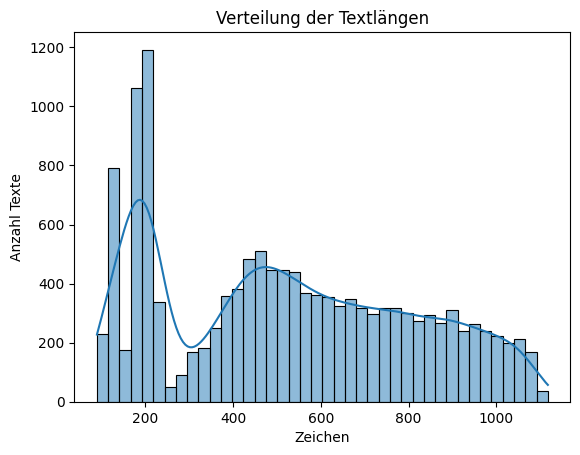

In [4]:
# Datum konvertieren
# df['date'] = pd.to_datetime(df['date']) # This column does not exist in the dataframe

# Textlänge berechnen
df_news['text_length'] = df_news['Content'].astype(str).apply(len) # Use 'Content' column

# Statistiken
print(df_news['text_length'].describe())

# Histogramm
sns.histplot(df_news['text_length'], bins=40, kde=True)
plt.title("Verteilung der Textlängen")
plt.xlabel("Zeichen")
plt.ylabel("Anzahl Texte")
plt.show()

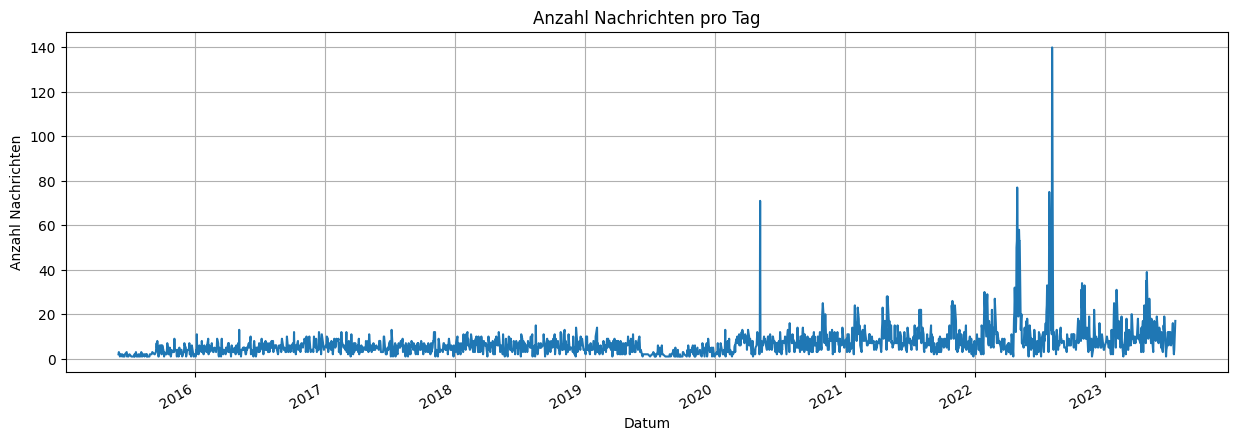

In [10]:
# Group by time and count the number of entries
daily_counts = df_news.groupby('Impact Date').size()

# Plot the daily counts
daily_counts.plot(figsize=(15,5), title="Anzahl Nachrichten pro Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Nachrichten")
plt.grid(True)
plt.show()

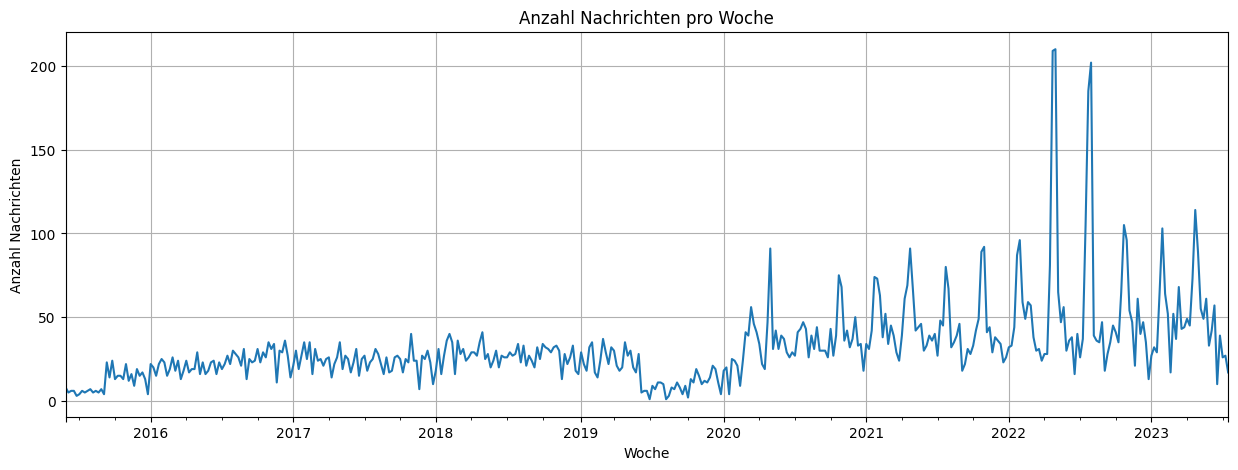

In [13]:
# Gruppierung nach Woche
weekly_counts = df_news.groupby(df_news['Impact Date'].dt.to_period('W')).size()
weekly_counts.index = weekly_counts.index.to_timestamp()  # für saubere X-Achse im Plot

# Plot
weekly_counts.plot(figsize=(15, 5), title="Anzahl Nachrichten pro Woche")
plt.xlabel("Woche")
plt.ylabel("Anzahl Nachrichten")
plt.grid(True)
plt.show()


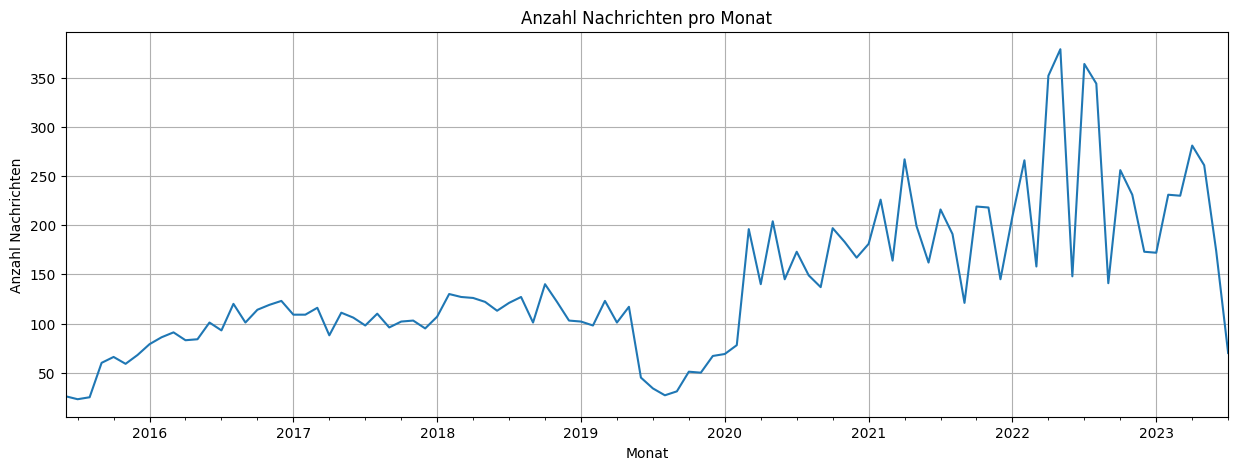

In [12]:
# Gruppieren nach Monat
monthly_counts = df_news.groupby(df_news['Impact Date'].dt.to_period('M')).size()

# Optional: wieder zu Timestamp (für schöneres Plotten)
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot
monthly_counts.plot(figsize=(15,5), title="Anzahl Nachrichten pro Monat")
plt.xlabel("Monat")
plt.ylabel("Anzahl Nachrichten")
plt.grid(True)
plt.show()


In [19]:
# Alle Wörter extrahieren
all_words = []
df_news['Cleaned Content'].dropna().apply(lambda t: all_words.extend(t))
word_freq = Counter(all_words)
print("Top 20 häufigste Wörter:")
print(word_freq.most_common(20))

Top 20 häufigste Wörter:
[('united', 16305), ('states', 16303), ('percent', 13092), ('market', 10888), ('usd', 10279), ('earnings', 9296), ('expectations', 8412), ('week', 6547), ('month', 6398), ('year', 6226), ('points', 5743), ('index', 4885), ('stock', 4838), ('rate', 4414), ('since', 4372), ('fed', 4168), ('stocks', 4126), ('billion', 3875), ('high', 3740), ('compared', 3730)]


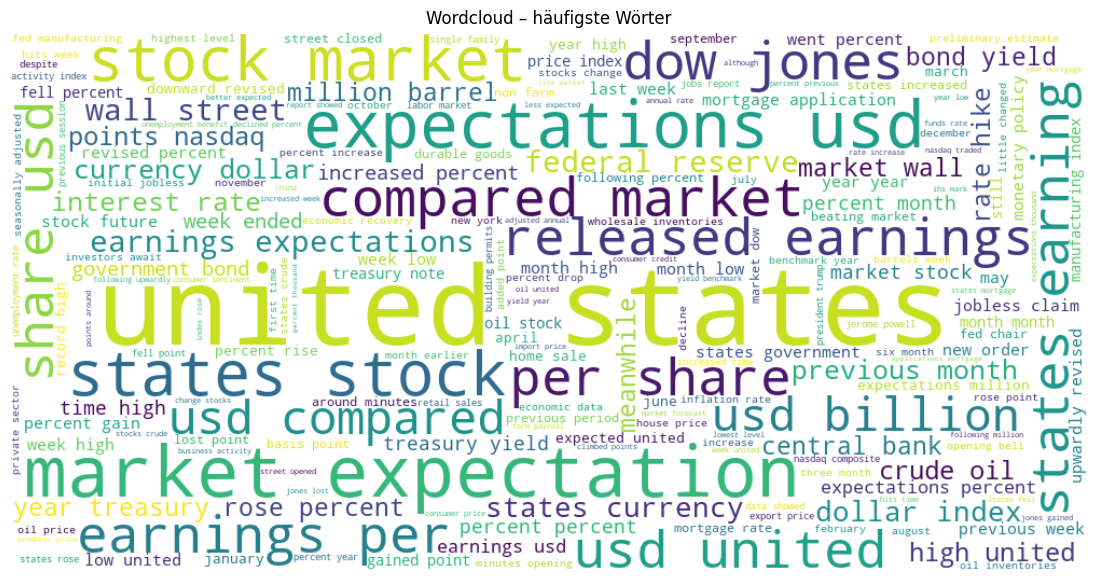

In [20]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud – häufigste Wörter")
plt.show()


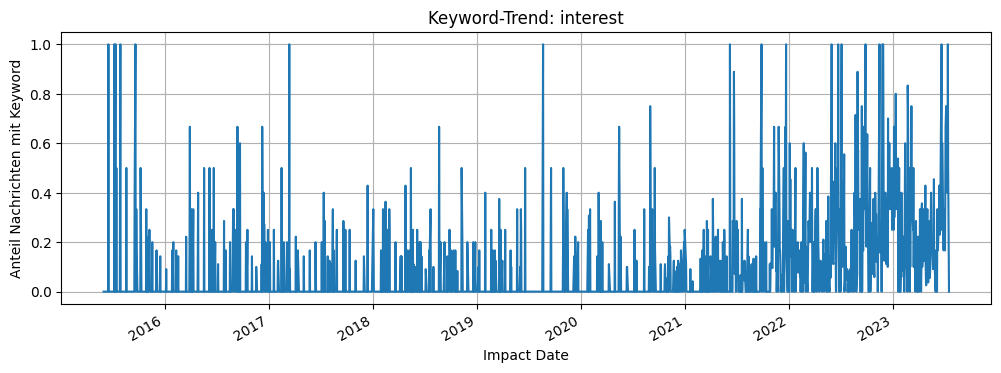

In [22]:
def keyword_trend(keyword):
    df_news['has_keyword'] = df_news['Content'].str.lower().str.contains(fr'\b{keyword}\b', na=False)
    trend = df_news.groupby('Impact Date')['has_keyword'].mean()
    trend.plot(figsize=(12,4), title=f"Keyword-Trend: {keyword}")
    plt.ylabel("Anteil Nachrichten mit Keyword")
    plt.grid(True)
    plt.show()

# Beispiel: Keyword-Analyse für „inflation“
keyword_trend("interest")

In [6]:
print("==== DEBUG df_news ====")
print("Shape:", df_news.shape)
print("Spaltennamen:", df_news.columns.tolist())
print("Erste Zeilen:")
print(df_news.head())


==== DEBUG df_news ====
Shape: (13636, 17)
Spaltennamen: ['Title', 'Tag', 'Date_x', 'Content', 'Cleaned Content', 'Weekday', 'Impact Date', 'Date_y', 'Label', 'Change', 'Sma_5', 'Volatility', 'Prev_change', 'Simple Label', 'finbert_sentiment', 'finbert_label', 'text_length']
Erste Zeilen:
                                               Title                      Tag  \
0              TSX Slightly Down, Books Weekly Gains             Stock Market   
1  US Budget Deficit Widens More than Expected in...  Government Budget Value   
2                             Visa Hits 24-week High                   stocks   
3                           Amazon Hits 43-week High                   stocks   
4       10-Year Treasury Yield Falls for 4th Session      Government Bond 10Y   

      Date_x                                            Content  \
0 2023-07-16  TSX Slightly Down, Books Weekly GainsUnited St...   
1 2023-07-14  US Budget Deficit Widens More than Expected in...   
2 2023-07-14  Visa Hit

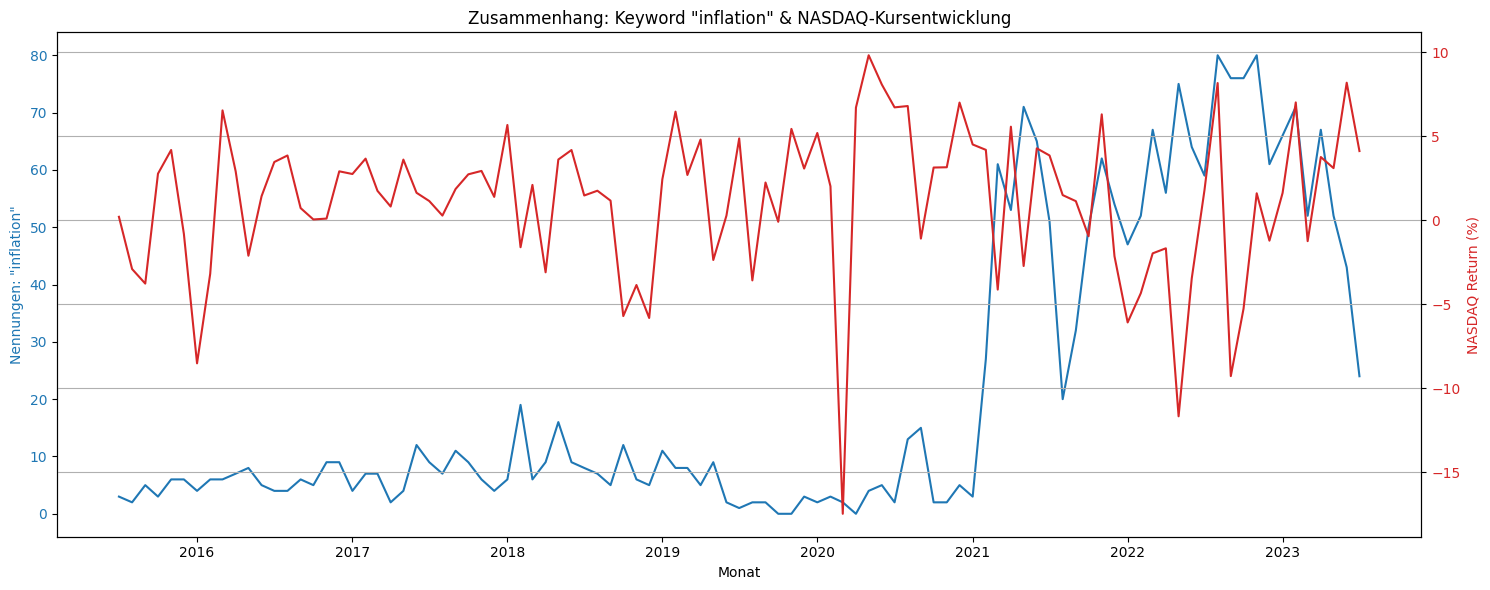

In [26]:
# Sicherstellen, dass Impact Date ein datetime-Format hat
df_news['Impact Date'] = pd.to_datetime(df_news['Impact Date'])

# Monat extrahieren (z. B. "2021-05")
df_news['Month'] = df_news['Impact Date'].dt.to_period('M')

# Neues Feld: enthält Nachricht das Wort "inflation"?
df_news['has_inflation'] = df_news['Content'].str.lower().str.contains(r'\binflation\b', na=False)

# Gruppieren: Wie oft kam "inflation" in einem Monat vor?
monthly_keyword_counts = df_news.groupby('Month')['has_inflation'].sum()




# Annahme: df_price enthält Spalte 'Date' und 'Close'
df_price['Month'] = df_price['Date'].dt.to_period('M')

# Monatliches Mittel des Schlusskurses
monthly_prices = df_price.groupby('Month')['Close'].mean()

# Monatliche prozentuale Veränderung
monthly_returns = monthly_prices.pct_change()




import matplotlib.pyplot as plt

# DataFrame zusammenbauen
df_analysis = pd.DataFrame({
    'inflation_mentions': monthly_keyword_counts,
    'nasdaq_return': monthly_returns
}).dropna()

# Monat zurück in Timestamp für schöneres Plotten
df_analysis.index = df_analysis.index.to_timestamp()

# Plot
fig, ax1 = plt.subplots(figsize=(15,6))

# Linke Achse: Keyword-Nennungen
ax1.set_xlabel('Monat')
ax1.set_ylabel('Nennungen: "inflation"', color='tab:blue')
ax1.plot(df_analysis.index, df_analysis['inflation_mentions'], color='tab:blue', label='Nennungen "inflation"')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Rechte Achse: Kursveränderung
ax2 = ax1.twinx()
ax2.set_ylabel('NASDAQ Return (%)', color='tab:red')
ax2.plot(df_analysis.index, df_analysis['nasdaq_return'] * 100, color='tab:red', label='NASDAQ Veränderung (%)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titel & Layout
plt.title('Zusammenhang: Keyword "inflation" & NASDAQ-Kursentwicklung')
fig.tight_layout()
plt.grid(True)
plt.show()


#In diesem Diagramm wird der Zusammenhang zwischen der Häufigkeit  
#des Keywords „inflation“ in Finanznachrichten und der NASDAQ-Entwicklung dargestellt.

#Die blaue Linie zeigt die Keyword-Nennungen pro Monat,  
#die rote Linie die monatliche NASDAQ-Rendite in Prozent.


In [24]:
from collections import Counter

# Sicherstellen, dass Impact Date datetime ist
df_news['Impact Date'] = pd.to_datetime(df_news['Impact Date'])

# Neue Spalte für Jahr
df_news['Year'] = df_news['Impact Date'].dt.year

# Container für Jahres-Topwörter
top_words_by_year = {}

for year, group in df_news.groupby('Year'):
    words = []
    group['Cleaned Content'].dropna().apply(lambda tokens: words.extend(tokens))
    word_counts = Counter(words).most_common(5)

    top_words_by_year[str(year)] = {
        f"Top{i+1}_Word": word for i, (word, _) in enumerate(word_counts)
    }
    top_words_by_year[str(year)].update({
        f"Top{i+1}_Count": count for i, (_, count) in enumerate(word_counts)
    })

# DataFrame erstellen
top_words_year_df = pd.DataFrame.from_dict(top_words_by_year, orient='index')
top_words_year_df.index.name = 'Jahr'

# Anzeigen
top_words_year_df


,Top1_Word,Top2_Word,Top3_Word,Top4_Word,Top5_Word,Top1_Count,Top2_Count,Top3_Count,Top4_Count,Top5_Count
Jahr,,,,,,,,,,
2015,percent,united,states,month,index,531,422,421,195,154
2016,percent,states,united,market,points,2073,1675,1674,979,974
2017,percent,united,states,market,points,2744,1747,1740,977,922
2018,percent,united,states,market,points,2785,1917,1901,1232,978
2019,percent,united,states,market,month,1555,1131,1117,663,611
2020,states,united,market,points,stock,2182,2082,1236,1200,1112
2021,united,states,earnings,usd,market,2485,2481,2031,1976,1894
2022,usd,earnings,expectations,united,states,4517,4448,3413,3273,3235
2023,united,states,earnings,usd,market,1574,1551,1136,1109,1049
